## Dependencies and Datasets Importing

In [4]:
# Dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
plt.style.use('seaborn')

In [5]:
# Store filepath in a variable
madden_ratings_csv = "Resources/Madden_Player_Ratings_2015-2019.csv"
team_standings_2015_2018_csv = "Resources/Team_Standings_2015-2018.csv"
player_stats_2015_2018_csv = "Resources/Player_Stats_2015-2018.csv"

In [6]:
# Read our Data file with the pandas library
madden_ratings_df = pd.read_csv(madden_ratings_csv, encoding="UTF-8")
team_standings_2015_2018_df = pd.read_csv(team_standings_2015_2018_csv, encoding="UTF-8")
player_stats_2015_2018_df = pd.read_csv(player_stats_2015_2018_csv, encoding="UTF-8")

## Data Cleansing

In [7]:
#  Create a new df for each years data for each dataframe 
madden_ratings_2015_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2015]
madden_ratings_2016_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2016]
madden_ratings_2017_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2017]
madden_ratings_2018_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2018]
madden_ratings_2019_df = madden_ratings_df.loc[madden_ratings_df["Season Year"] == 2019]

team_standings_2015_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2015]
team_standings_2016_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2016]
team_standings_2017_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2017]
team_standings_2018_df = team_standings_2015_2018_df.loc[team_standings_2015_2018_df["Year"] == 2018]

player_stats_2015_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2015]
player_stats_2016_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2016]
player_stats_2017_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2017]
player_stats_2018_df = player_stats_2015_2018_df.loc[player_stats_2015_2018_df["Year"] == 2018]

In [8]:
# Rename the column: Full name to Player
madden_ratings_2015_df = madden_ratings_2015_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2016_df = madden_ratings_2016_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2017_df = madden_ratings_2017_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2018_df = madden_ratings_2018_df.rename(columns={"Full Name" : "Player"})
madden_ratings_2019_df = madden_ratings_2019_df.rename(columns={"Full Name" : "Player"})

# Drop columns: First Name, Last Name, Season Year
madden_ratings_2015_df = madden_ratings_2015_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2016_df = madden_ratings_2016_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2017_df = madden_ratings_2017_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2018_df = madden_ratings_2018_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)
madden_ratings_2019_df = madden_ratings_2019_df.drop(["First Name", "Last Name", "Season Year", "Position"], axis=1)


In [9]:
# Replace the column: FDPt\n to FDPt
player_stats_2015_df = player_stats_2015_df.replace("\n", "")
player_stats_2016_df = player_stats_2016_df.replace("\n", "")
player_stats_2017_df = player_stats_2017_df.replace("\n", "")
player_stats_2018_df = player_stats_2018_df.replace("\n", "")

# Drop columns: Tm, Age, Games, Games Started, 2Pt Made, 2Pt Pass, DKPt, FDPt, VBD
player_stats_2015_df = player_stats_2015_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)
player_stats_2016_df = player_stats_2016_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)
player_stats_2017_df = player_stats_2017_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)
player_stats_2018_df = player_stats_2018_df.drop(["Tm", "Age", "Games", "Games Started", "2Pt Made", "2Pt Pass", "DKPt", "FDPt", "VBD"], axis=1)


In [10]:
# Merge dataframes: Madden ratings & Player stats
final_2015_df = pd.merge(player_stats_2015_df, madden_ratings_2015_df, on="Player", how="outer")
final_2016_df = pd.merge(player_stats_2016_df, madden_ratings_2016_df, on="Player", how="outer")
final_2017_df = pd.merge(player_stats_2017_df, madden_ratings_2017_df, on="Player", how="outer")
final_2018_df = pd.merge(player_stats_2018_df, madden_ratings_2018_df, on="Player", how="outer")

In [ ]:
# Replace SD to LAC since SD is combined with LAC
final_2015_df = final_2015_df.replace("SD", "LAC")
final_2016_df = final_2016_df.replace("SD", "LAC")
final_2017_df_df = final_2017_df.replace("SD", "LAC")
final_2018_df = final_2018_df.replace("SD", "LAC")

## Data Analysis

### Team Level

In [11]:
# Calculate the average overall points for all teams in each year
overall_2015 = final_2015_df["Overall"].mean()
overall_2016 = final_2016_df["Overall"].mean()
overall_2017 = final_2017_df["Overall"].mean()
overall_2018 = final_2018_df["Overall"].mean()

overall_summary = round(pd.Series([overall_2015, overall_2016, overall_2017, overall_2018], ["2015", "2016", "2017", "2018"]), 2)

overall_summary


2015    73.55
2016    71.30
2017    71.71
2018    72.31
dtype: float64

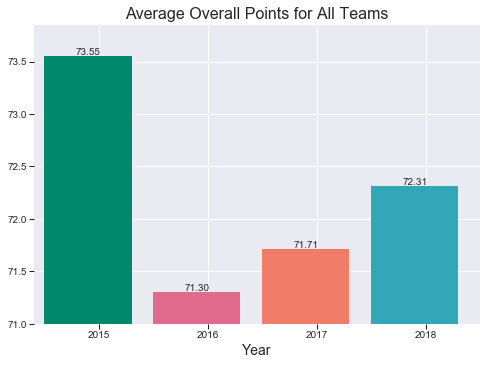

In [12]:
# Create the barchart
x_axis = np.arange(0, 4, 1)
color_2015 = "#00896C"
color_2016 = "#E16B8C"
color_2017 = "#F17C67"
color_2018 = "#33A6B8"
bar_width = 0.8

# Set the condition
year2015 = overall_summary == 73.55
year2016 = overall_summary == 71.30
year2017 = overall_summary == 71.71
year2018 = overall_summary == 72.31

# Set elements to create a chart
fig, ax = plt.subplots()
ax.set_xlim(-0.1, len(x_axis))
ax.set_ylim(min(overall_summary)-0.3, max(overall_summary)+0.3)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("")
ax.set_title("Average Overall Points for All Teams", fontsize = 16)
ax.set_xticks([x+0.5 for x in x_axis])
ax.set_xticklabels(overall_summary.index)
ax.tick_params(direction="out", length=5, width=1, color="#1C1C1C", axis="both", pad=2)

bar2015 = ax.bar(x_axis[year2015], overall_summary[year2015], color=color_2015, width=bar_width, align="edge")
bar2016 = ax.bar(x_axis[year2016], overall_summary[year2016], color=color_2016, width=bar_width, align="edge")
bar2017 = ax.bar(x_axis[year2017], overall_summary[year2017], color=color_2017, width=bar_width, align="edge")
bar2018 = ax.bar(x_axis[year2018], overall_summary[year2018], color=color_2018, width=bar_width, align="edge")

# Put numbers for each year in each bar
def label(point):
    for x in point:
        bar_height = x.get_height()
        bar_format = "{0:.2f}".format(bar_height)
        ax.text(x.get_x() + x.get_width()/2, 1*bar_height, bar_format, ha="center", va="bottom")
        
label(bar2015)
label(bar2016)
label(bar2017)
label(bar2018)

fig.savefig("Figure1 - Average Overall Points")

In [72]:
# Create subgroups for the average overall points of each team in each year
team_overall_2015 = final_2015_df.groupby(["Team"])["Overall"].mean()
team_overall_2016 = final_2016_df.groupby(["Team"])["Overall"].mean()
team_overall_2017 = final_2017_df.groupby(["Team"])["Overall"].mean()
team_overall_2018 = final_2018_df.groupby(["Team"])["Overall"].mean()

# Put the average overall points into a dataframe & Round the results to 2 decimal place
team_overall_summary = round(pd.DataFrame({"2015" : team_overall_2015,
                        "2016" : team_overall_2016,
                        "2017" : team_overall_2017,
                        "2018" : team_overall_2018}), 2)

# Calculate the overall average for each team in 4 years
team_overall_summary["Total Avg"] = round(team_overall_summary.agg(["mean"], axis="columns"), 2)

team_overall_summary.head()

,2015,2016,2017,2018,Total Avg
ARI,73.35,71.45,70.97,69.99,71.44
ATL,73.58,70.99,72.21,72.19,72.24
BAL,74.10,72.66,71.36,72.77,72.72
BUF,73.22,72.35,71.83,71.92,72.33
CAR,73.77,72.03,72.03,72.00,72.46


In [101]:
# Replace the team name: PHL to PHI
team_standings_2015_df = team_standings_2015_df.replace("PHL", "PHI")
team_standings_2016_df = team_standings_2016_df.replace("PHL", "PHI")
team_standings_2017_df = team_standings_2017_df.replace("PHL", "PHI")
team_standings_2018_df = team_standings_2018_df.replace("PHL", "PHI")

# Replace nan in Playoff Rank with zero
team_standings_2015_df["Playoff Rank"] = team_standings_2015_df["Playoff Rank"].fillna(0)
team_standings_2016_df["Playoff Rank"] = team_standings_2016_df["Playoff Rank"].fillna(0)
team_standings_2017_df["Playoff Rank"] = team_standings_2017_df["Playoff Rank"].fillna(0)
team_standings_2018_df["Playoff Rank"] = team_standings_2018_df["Playoff Rank"].fillna(0)

# Convert float to integer
team_standings_2015_df["Playoff Rank"] = team_standings_2015_df["Playoff Rank"].astype(int)
team_standings_2016_df["Playoff Rank"] = team_standings_2016_df["Playoff Rank"].astype(int)
team_standings_2017_df["Playoff Rank"] = team_standings_2017_df["Playoff Rank"].astype(int)
team_standings_2018_df["Playoff Rank"] = team_standings_2018_df["Playoff Rank"].astype(int)


In [108]:
team_standings_2015_df.head()

,Year,Team,Team Mascot,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Playoff Rank
96,2015,CAR,Panthers,15,1,0,0.938,500,308,192,12.0,-3.9,8.1,6.0,2.1,2
97,2015,ARI,Cardinals,13,3,0,0.813,489,313,176,11.0,1.3,12.3,9.0,3.4,3
98,2015,NE,Patriots,12,4,0,0.750,465,315,150,9.4,-2.4,7.0,5.3,1.7,3
99,2015,CIN,Bengals,12,4,0,0.750,419,279,140,8.8,1.9,10.6,4.8,5.8,5
100,2015,DEN,Broncos,12,4,0,0.750,355,296,59,3.7,2.1,5.8,0.3,5.5,1


In [116]:
win_2015 = team_standings_2015_df.groupby(["Team"])["W"].mean()
win_2016 = team_standings_2016_df.groupby(["Team"])["W"].mean()
win_2017 = team_standings_2017_df.groupby(["Team"])["W"].mean()
win_2018 = team_standings_2018_df.groupby(["Team"])["W"].mean()

win_summary = pd.DataFrame({"2015" : win_2015,
                        "2016" : win_2016,
                        "2017" : win_2017,
                        "2018" : win_2018})

win_summary.head()

,2015,2016,2017,2018
ARI,13.0,7.0,8.0,3.0
ATL,8.0,11.0,10.0,7.0
BAL,5.0,8.0,9.0,10.0
BUF,8.0,7.0,9.0,6.0
CAR,15.0,6.0,11.0,7.0
